### Team Members:

### Erick Kramer
### Mihir Patil
### Sushma Devaramani

## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import math
from scipy.optimize import minimize
%matplotlib inline

/home/kramer/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/kramer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


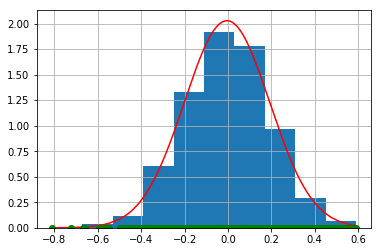

Actual mean: -0.004345727348075542
Actual standard deviation: 0.19675950981583987
Verified mean: -0.004345734287940735
Verified standard deviation: 0.1967595042614976


In [3]:
N = 2000
mu = 0
var = 0.2
sigma = math.sqrt(var)
X_axis = np.linspace(-20,20,N)
X = np.random.normal(mu,var,N)
n, bins, patches = plt.hist(X, normed=True)
y = mlab.normpdf( bins, mu, sigma)
X.sort()
plt.plot(X, stats.norm.pdf(X, np.mean(X), np.std(X)),'r')
plt.plot(X, [0.001]*len(X), 'go')
plt.grid()
plt.show()

#verifying the mean and variance using minimize function
def minimize_function(x, args):
    #mean and sigma values
    m = x[0]
    sig = x[1]
    X_ = args[0]
    pdf = args[1]
    #computing pdf from the formula
    y_ = (np.exp(-1*((X_-m)**2)/(2*sig**2)))/(sig*np.sqrt(2*np.pi))
    #compare the above pdf with the gaussian pdf, Use stats.norm.logpdf
    #sum the difference in pdf values which should result to zero.
    compared = -np.sum(stats.norm.logpdf(y_, loc=pdf))
    return compared

#initialize mean and variance
x0 = [1,2]
pdf_ = stats.norm.pdf(X, np.mean(X), np.std(X))
args = [X, pdf_]
result = minimize(minimize_function, x0, args = args, tol=0.001, method='BFGS')
print ("Actual mean:", np.mean(X))
print ("Actual standard deviation:", np.std(X))
print ("Verified mean:", result.x[0])
print ("Verified standard deviation:", result.x[1])

## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

### Kernel Density Estimation
Kernel density estimation is a non-parametric way of estimating probability density function of a random variable X. Kernels are used for this purpose. The kernel functions are typically smooth functions with a single mode at x=0.
There are several options in computing kernel density estimates in python. The task is to compare two of those options: scikit-learn and scipy.


### Comparison of scikit-learn and scipy methodologies for KDE
| scikit-learn                                                                	| scipy                                                                                 	|
|-----------------------------------------------------------------------------	|---------------------------------------------------------------------------------------	|
|1) Implemented using sklearn.neighbors.KernelDensity estimator                 	|1) Implemented using scipy.stats.gaussian_kde                                            	|
|2) Contains six kernels: gaussian, tophat, exponential, linear and cosine.     	|2) Contains only gaussian kernel.                                                        	|
|3) Uses Ball tree or KD tree for efficient queries.                            	|3) No Tree-based computation                                                             	|
|4) Emperical approach namely cross validation is used for bandwidth selection. 	|4) The common reference rule namely Silverman's rule is used for selection of bandwidth. 	|
|5) Estimates different charecterstics since it has six kernels.                	|5) Can estimate only based on gaussian kernel.                                           	|
|6) Results in a very flexible range of effective kernel shapes.                	|6) It has only one gaussian kernel shape.                                                	|



#### Citation
1. [https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)
2. [http://scikit-learn.org/stable/modules/density.html](http://scikit-learn.org/stable/modules/density.html)
3. [https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)
4. [http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/](http://www.mvstat.net/tduong/research/seminars/seminar-2001-05/)